In [ ]:
print('suka')

# Loading Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
from ydata_profiling import ProfileReport

In [ ]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 54.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f1d31583bdbede9f51fbd8440711bef32fe6eea507954fd0b7f18f36d8641245
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/UnsupervisedProject/Diabetes - UL project 1 (1).xlsx')
df.to_csv('dataset_.csv',sep = ',', encoding = 'utf-8', index = False)

# EDA - Exploratory Data Analysis


In [ ]:
df = pd.read_csv('dataset_.csv')
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Here we separate the dataset for male and female

df_male = df[df['Sex'] == 0]
df_female = df[df['Sex'] == 1]

In [ ]:
df_male.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
1,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0
2,3,0,0,1,32,0,0,1,1,1,0,3,0,0,0,0,0,0
3,12,0,1,1,24,1,1,1,1,1,0,3,0,4,0,0,1,0
5,10,0,1,1,29,1,0,1,1,0,0,1,0,0,1,0,0,0
6,9,0,0,1,30,0,0,1,0,1,0,2,0,0,0,0,0,0


In [ ]:
df_female.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
4,10,1,0,1,58,0,0,0,1,1,0,3,3,3,0,0,1,0
7,10,1,0,1,30,1,0,1,1,1,0,1,0,0,0,0,0,0
8,7,1,0,1,26,0,0,0,1,1,0,3,0,15,0,0,1,0
9,8,1,1,1,28,0,0,1,0,1,0,2,2,1,0,0,0,0


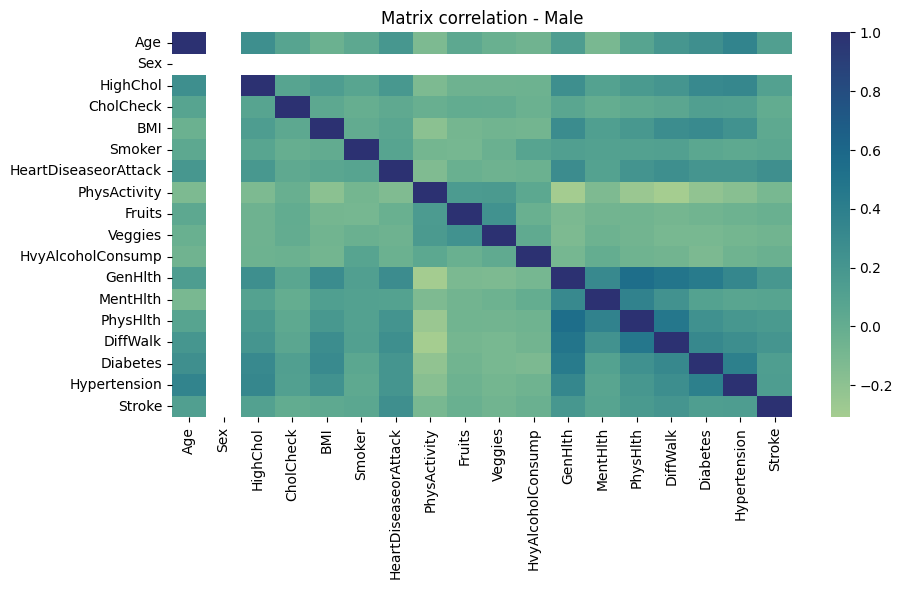

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df_male.corr(), cmap = 'crest')
plt.title('Matrix correlation - Male')
plt.show()

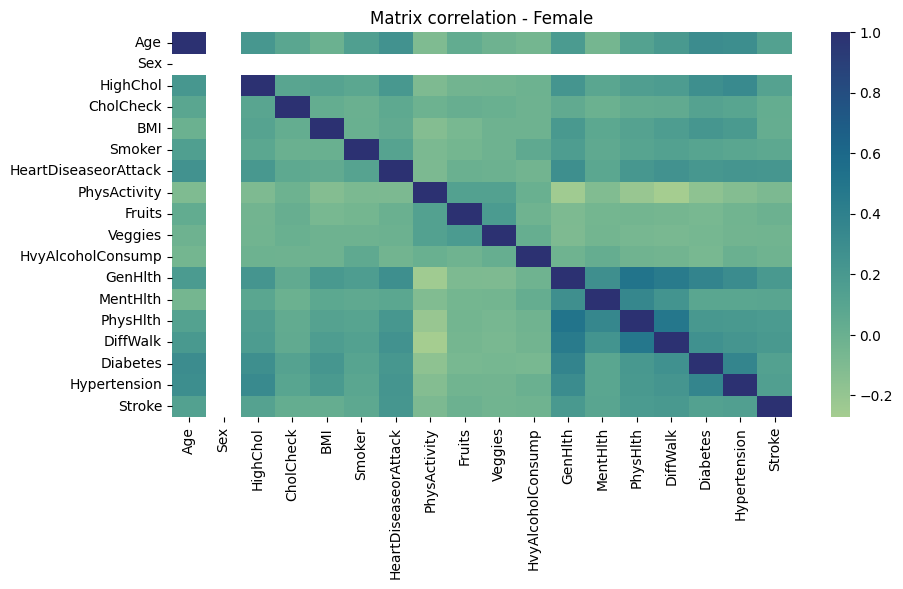

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df_female.corr(), cmap = 'crest')
plt.title('Matrix correlation - Female')
plt.show()

In [ ]:
# from the matrix correlation here we can't see any differences between nmale and female
# Let's explore more in the details to see if there are any patterns

Text(0.5, 1.0, 'Male Age Distribution')

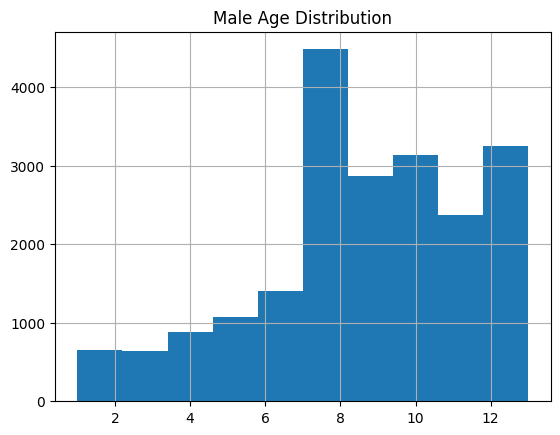

In [ ]:
df_male['Age'].hist()
plt.title('Male Age Distribution')

Text(0.5, 1.0, 'Female Age Distribution')

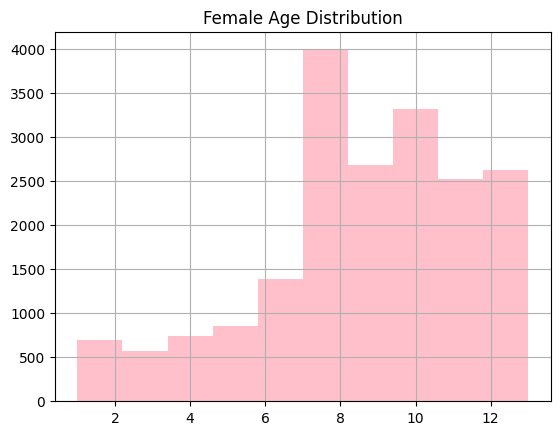

In [ ]:
df_female['Age'].hist(color = 'pink')
plt.title('Female Age Distribution')

In [ ]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

In [ ]:
columns =['Sex','BMI', 'HighChol', 'CholCheck','Smoker',
          'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
          'HvyAlcoholConsump','Hypertension', 'DiffWalk']

def create_pivot(dataframe, x_column):
  df_plot = dataframe.groupby([x_column, 'Diabetes']).size() \
    .reset_index().pivot(columns='Diabetes', index=x_column, values=0)
  return df_plot

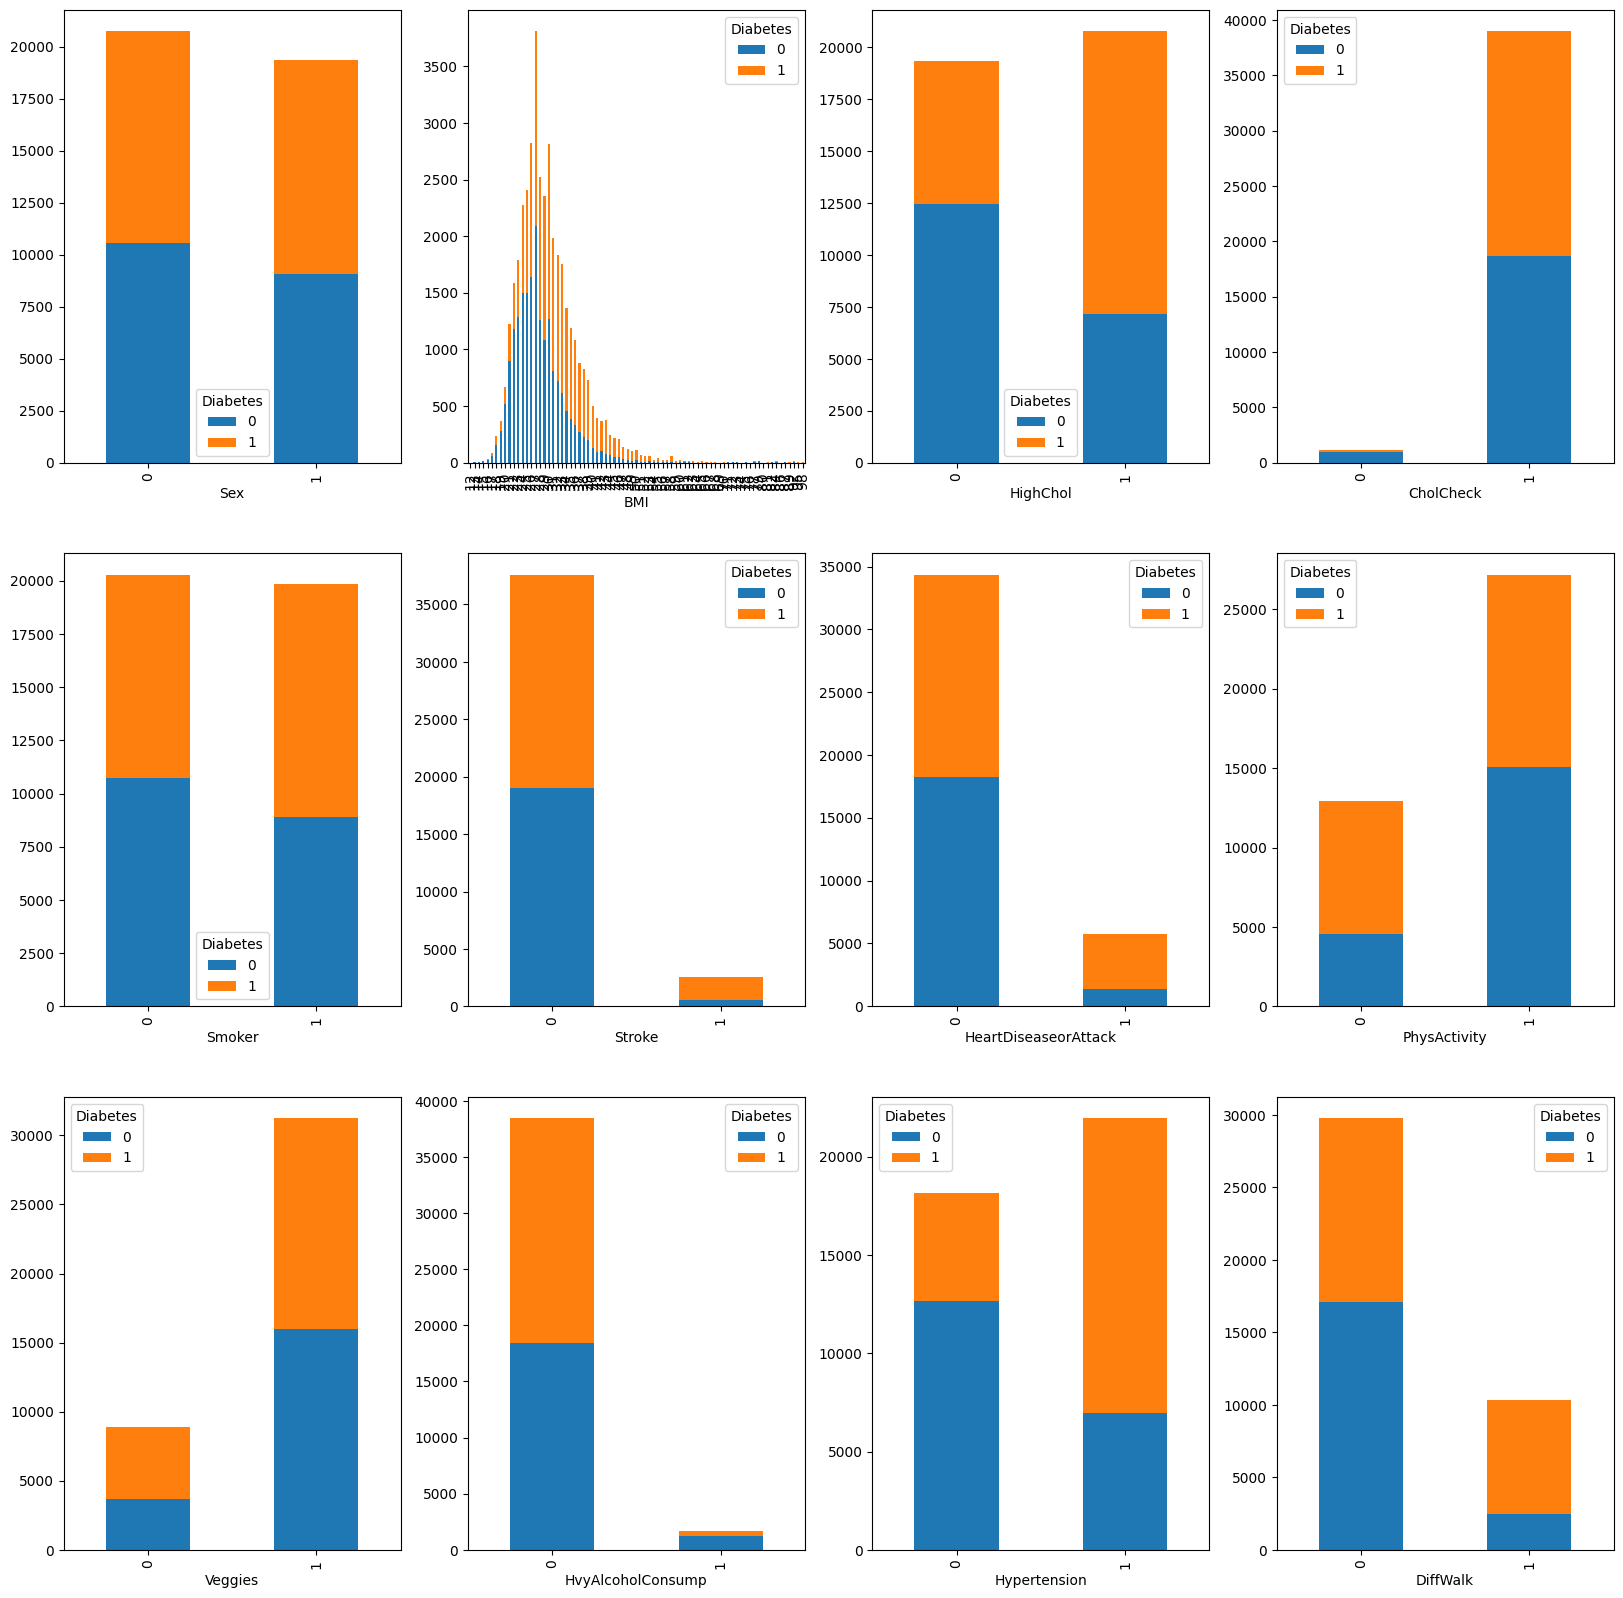

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(columns)

for i in range(c):
    create_pivot(df, columns[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(columns[i])

fig.show()

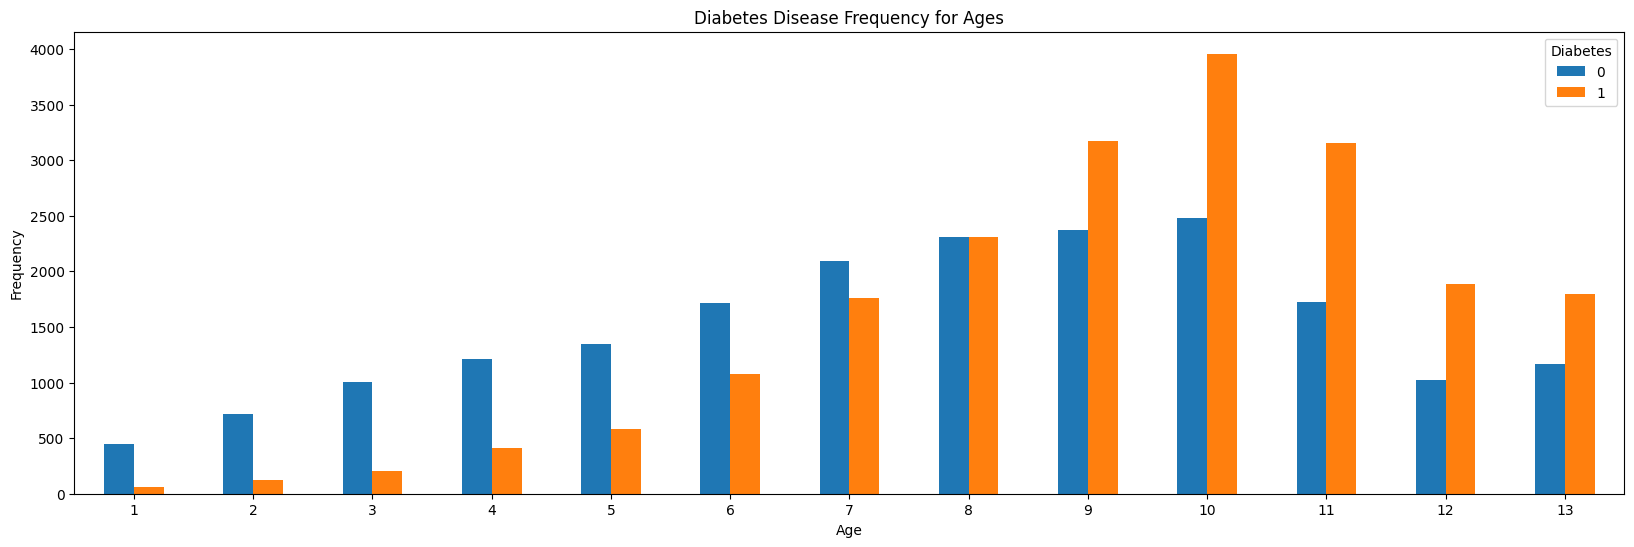

In [ ]:
pd.crosstab(df.Age,df.Diabetes).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

# PROXIMITY MEASURES

In [ ]:
df.iloc[1]

Age                      8
Sex                      0
HighChol                 0
CholCheck                1
BMI                     29
Smoker                   1
HeartDiseaseorAttack     0
PhysActivity             1
Fruits                   1
Veggies                  1
HvyAlcoholConsump        0
GenHlth                  2
MentHlth                 0
PhysHlth                 0
DiffWalk                 0
Diabetes                 0
Hypertension             0
Stroke                   0
Name: 1, dtype: int64

In [ ]:
df.iloc[2]

Age                      3
Sex                      0
HighChol                 0
CholCheck                1
BMI                     32
Smoker                   0
HeartDiseaseorAttack     0
PhysActivity             1
Fruits                   1
Veggies                  1
HvyAlcoholConsump        0
GenHlth                  3
MentHlth                 0
PhysHlth                 0
DiffWalk                 0
Diabetes                 0
Hypertension             0
Stroke                   0
Name: 2, dtype: int64

In [ ]:
# In order to compute a proximity measure among all the patients it is reasonable to keep only the attributes
# that has the same

In [ ]:
df.values

array([[ 4,  1,  0, ...,  0,  1,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       [ 3,  0,  0, ...,  0,  0,  0],
       ...,
       [10,  1,  1, ...,  1,  1,  0],
       [ 4,  0,  1, ...,  0,  0,  0],
       [11,  1,  1, ...,  1,  1,  0]])